## Importing libs

In [2]:
 import pandas
 import numpy
 from matplotlib import pyplot as plot
 import seaborn as sns

## Exploring the Data

In [3]:
dataset = pandas.read_csv('dataset.csv',sep=';',parse_dates=['data'])

dataset = dataset.sort_values(by='data')

In [4]:
dataset.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76.0,NaN,NaN,NaN,2020-02-25,9.0,210147125.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
858,Norte,AM,NaN,13.0,NaN,NaN,NaN,2020-02-25,9.0,4144597.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1144,Norte,RR,NaN,14.0,NaN,NaN,NaN,2020-02-25,9.0,605761.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1430,Norte,PA,NaN,15.0,NaN,NaN,NaN,2020-02-25,9.0,8602865.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1716,Norte,AP,NaN,16.0,NaN,NaN,NaN,2020-02-25,9.0,845731.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


### Checking for nan values

In [5]:
dataset.query('data != data')

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
75190,Norte,PA,Santa M,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Charts and Visualizations

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 0, 'Meses')

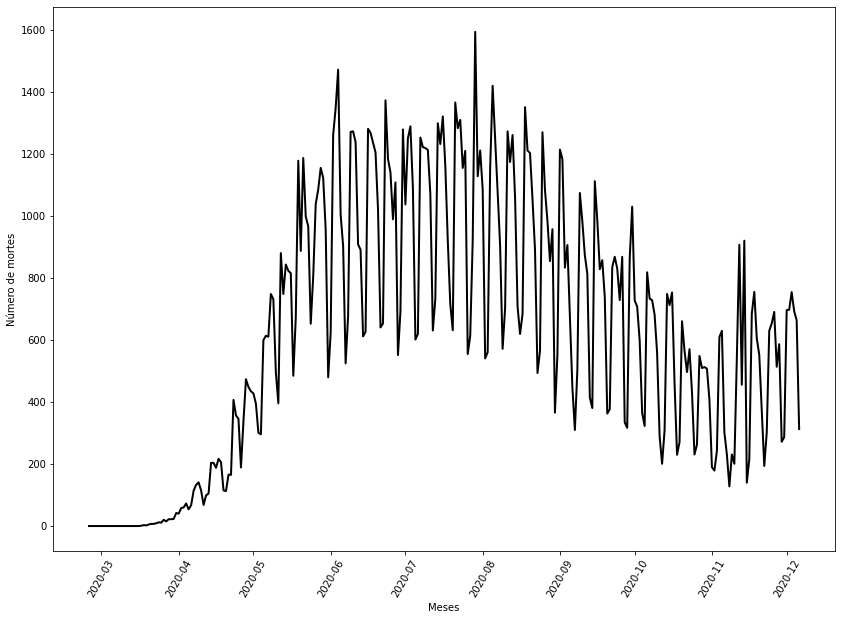

In [42]:
# Deaths through time
deaths_per_date_columns = ['data', 'obitosNovos']

deaths_per_date = dataset[deaths_per_date_columns].groupby(['data']).max().reset_index()

plot.figure(figsize=(14,10))

sns.lineplot(data=deaths_per_date, x='data', y='obitosNovos', color='black', linewidth=2)
plot.xticks(rotation=60)
plot.ylabel('Número de mortes')
plot.xlabel('Meses')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 0, 'Meses')

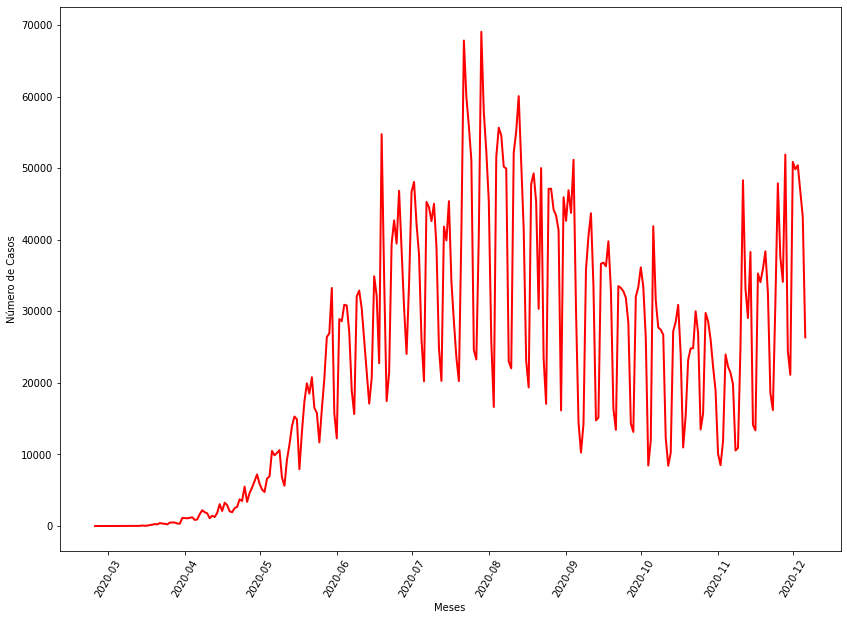

In [15]:
# Cases through time
new_cases_per_date_columns = ['data', 'casosNovos']

new_cases_per_date = dataset[new_cases_per_date_columns].groupby(['data']).max().reset_index()

plot.figure(figsize=(14,10))

sns.lineplot(data=new_cases_per_date, x='data', y='casosNovos', color='red', linewidth=2)
plot.xticks(rotation=60)
plot.locator_params(axis='x', nbins=5)
plot.ylabel('Número de Casos')
plot.xlabel('Meses')

Text(0.5, 0.98, 'Casos x Mortes diárias')

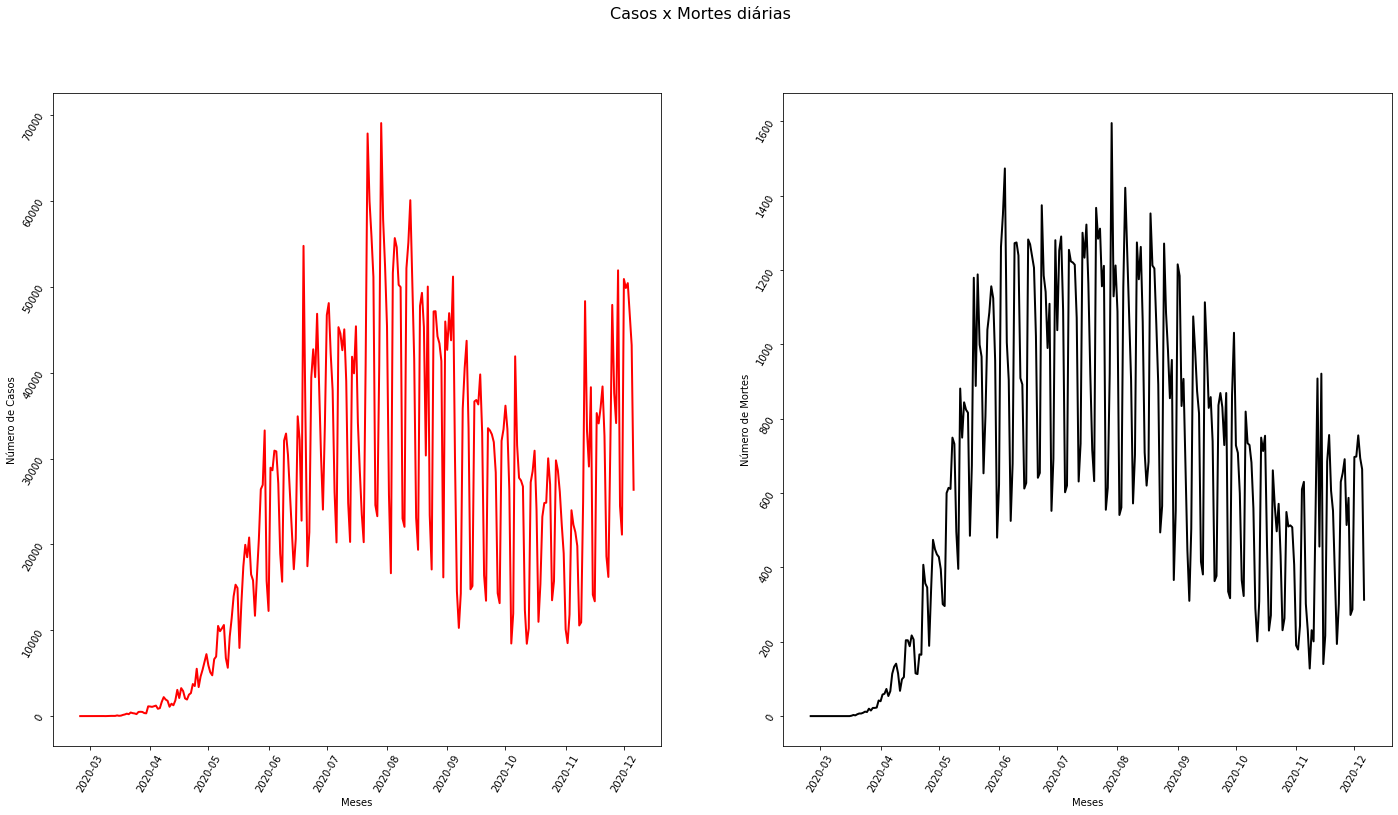

In [50]:
figure, axes = plot.subplots(1,2)
figure.set_size_inches((24,12))

sns.lineplot(data=new_cases_per_date, x='data', y='casosNovos', color='red', linewidth=2, ax=axes[0])
axes[0].set_xlabel('Meses')
axes[0].set_ylabel('Número de Casos')
axes[0].tick_params(labelrotation=60)


sns.lineplot(data=deaths_per_date, x='data', y='obitosNovos', color='black', linewidth=2, ax=axes[1])
axes[1].set_xlabel('Meses')
axes[1].set_ylabel('Número de Mortes')
axes[1].tick_params(labelrotation=60)

figure.suptitle('Casos x Mortes diárias', fontsize=16)